## Sentiment Analysis on the IMDB Dataset

dataset link: https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format

### Data Preparation

#### Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import torch

In [2]:
train = pd.read_csv("../data/IMDB Sentiment Analysis/Train.csv")

In [3]:
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
test = pd.read_csv("../data/IMDB Sentiment Analysis/Test.csv")
val = pd.read_csv("../data/IMDB Sentiment Analysis/Valid.csv")

In [5]:
df_all = pd.concat([train, val, test], axis=0)

In [6]:
df_all.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [7]:
print(f"No. of reviews = {len(df_all)}")

No. of reviews = 50000


In [8]:
df_all["text"][0]

0    I grew up (b. 1965) watching and loving the Th...
0    It's been about 14 years since Sharon Stone aw...
0    I always wrote this series off as being a comp...
Name: text, dtype: object

#### Cleaning the data

##### Remove punctuation and numbers

In [9]:
import re
def  clean_text(text):
    text = text.lower()
    text = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)  
    # remove numbers
    text = re.sub(r"\d+", "", text)
    
    return text

In [10]:
df_all["text"] = df_all["text"].apply(lambda text: clean_text(text))

In [11]:
df_all.head()

,text,label
0,i grew up b watching and loving the thunderbi...,0
1,when i put this movie in my dvd player and sat...,0
2,why do people who do not know what a particula...,0
3,even though i have great interest in biblical ...,0
4,im a die hard dads army fan and nothing will e...,1


##### Remove stop words

In [12]:
import nltk

In [13]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk.corpus import stopwords
stop_words = stopwords.words("english")

In [15]:
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [16]:
def remove_stop_words(text):
    words = text.split()
    new_words = [word for word in words if word not in stop_words]
    text = " ".join(new_words)
    
    return text

In [17]:
df_all["text"] = df_all["text"].apply(lambda text: remove_stop_words(text))

In [18]:
df_all.head()

,text,label
0,grew b watching loving thunderbirds mates scho...,0
1,put movie dvd player sat coke chips expectatio...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movies bor...,0
4,im die hard dads army fan nothing ever change ...,1


##### Tokenizing

In [19]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
from nltk.tokenize import word_tokenize

In [21]:
def tokenize_text(text):
    return word_tokenize(text)

In [22]:
df_all["text"] = df_all["text"].apply(lambda text: tokenize_text(text))

In [23]:
df_all.head()

,text,label
0,"[grew, b, watching, loving, thunderbirds, mate...",0
1,"[put, movie, dvd, player, sat, coke, chips, ex...",0
2,"[people, know, particular, time, past, like, f...",0
3,"[even, though, great, interest, biblical, movi...",0
4,"[im, die, hard, dads, army, fan, nothing, ever...",1


##### Lemmatization

In [24]:
nltk.download("wordnet")
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Neeraj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [25]:
lm = WordNetLemmatizer()

In [26]:
def lemmatize_text(word_list):
    new_word_list = [lm.lemmatize(word) for word in word_list]
    return new_word_list

In [27]:
df_all["text"] = df_all["text"].apply(lambda text: lemmatize_text(text))

In [28]:
df_all.head()

,text,label
0,"[grew, b, watching, loving, thunderbird, mate,...",0
1,"[put, movie, dvd, player, sat, coke, chip, exp...",0
2,"[people, know, particular, time, past, like, f...",0
3,"[even, though, great, interest, biblical, movi...",0
4,"[im, die, hard, dad, army, fan, nothing, ever,...",1


#### Analysis

In [29]:
df_all["word_count"] = df_all["text"].apply(lambda x: len(x))

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 1152x576 with 0 Axes>

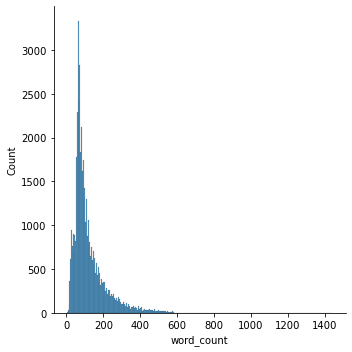

In [31]:
plt.figure(figsize=(16, 8))
sns.displot(df_all["word_count"])

In [32]:
print(f"mean: {df_all['word_count'].mean()} \
        median: {df_all['word_count'].median()} \
        std: {df_all['word_count'].std()} \
        max: {df_all['word_count'].max()} \
        min: {df_all['word_count'].min()}")

mean: 121.61684         median: 90.0         std: 91.62627055535738         max: 1440         min: 3


In [33]:
mean, std = df_all["word_count"].mean(), df_all["word_count"].std()

In [34]:
max_sequence_length = int(mean + 2 * std)

In [35]:
max_sequence_length

304

#### Build Vocab

In [36]:
all_words_list = list()
df_all["text"].apply(lambda x: all_words_list.extend(x))

0       None
1       None
2       None
3       None
4       None
        ... 
4995    None
4996    None
4997    None
4998    None
4999    None
Name: text, Length: 50000, dtype: object

In [37]:
len(all_words_list)

6080842

In [38]:
vocab = set(all_words_list)

In [39]:
len(vocab)

164676

In [40]:
word2idx = {word: i+1 for i, word in enumerate(vocab)}

#### Padding the sequences

##### First we need to convert words to indices

In [41]:
df_all["word_indices"] = df_all["text"].apply(lambda text: [word2idx[word] for word in text])

In [42]:
df_all.head()

,text,label,word_count,word_indices
0,"[grew, b, watching, loving, thunderbird, mate,...",0,85,"[127843, 27116, 82368, 75796, 133272, 50048, 1..."
1,"[put, movie, dvd, player, sat, coke, chip, exp...",0,157,"[104542, 12340, 140605, 9667, 139712, 32884, 4..."
2,"[people, know, particular, time, past, like, f...",0,98,"[68830, 113908, 11719, 38264, 54964, 139132, 4..."
3,"[even, though, great, interest, biblical, movi...",0,33,"[155522, 148951, 87976, 29017, 16804, 12340, 1..."
4,"[im, die, hard, dad, army, fan, nothing, ever,...",1,107,"[115858, 142711, 126915, 8203, 88118, 74581, 6..."


In [43]:
def pad_sequence(sequence, max_sequence_length):
    padding_idx = 0 
    sequence_length = len(sequence)
    if sequence_length > max_sequence_length:
        sequence = sequence[:max_sequence_length]
    elif sequence_length < max_sequence_length:
        for i in range(max_sequence_length - sequence_length):
            sequence.append(padding_idx)
    return sequence

In [44]:
df_all["padded_word_indices"] = df_all["word_indices"].apply(lambda x: pad_sequence(x, max_sequence_length))

In [45]:
df_all.head()

,text,label,word_count,word_indices,padded_word_indices
0,"[grew, b, watching, loving, thunderbird, mate,...",0,85,"[127843, 27116, 82368, 75796, 133272, 50048, 1...","[127843, 27116, 82368, 75796, 133272, 50048, 1..."
1,"[put, movie, dvd, player, sat, coke, chip, exp...",0,157,"[104542, 12340, 140605, 9667, 139712, 32884, 4...","[104542, 12340, 140605, 9667, 139712, 32884, 4..."
2,"[people, know, particular, time, past, like, f...",0,98,"[68830, 113908, 11719, 38264, 54964, 139132, 4...","[68830, 113908, 11719, 38264, 54964, 139132, 4..."
3,"[even, though, great, interest, biblical, movi...",0,33,"[155522, 148951, 87976, 29017, 16804, 12340, 1...","[155522, 148951, 87976, 29017, 16804, 12340, 1..."
4,"[im, die, hard, dad, army, fan, nothing, ever,...",1,107,"[115858, 142711, 126915, 8203, 88118, 74581, 6...","[115858, 142711, 126915, 8203, 88118, 74581, 6..."


##### Converting to numpy arrays

In [46]:
n_sequences = len(df_all)

In [47]:
all_data = np.zeros((n_sequences, max_sequence_length), dtype=np.int64)
for i, _list in enumerate(df_all["padded_word_indices"]):
    all_data[i] = np.asarray(_list)

In [48]:
all_data.shape

(50000, 304)

In [49]:
all_data

array([[127843,  27116,  82368, ...,      0,      0,      0],
       [104542,  12340, 140605, ...,      0,      0,      0],
       [ 68830, 113908,  11719, ...,      0,      0,      0],
       ...,
       [ 73691,  52757,  29868, ...,      0,      0,      0],
       [ 12340,   1065,   3447, ...,      0,      0,      0],
       [ 69348,  12340, 131638, ...,      0,      0,      0]], dtype=int64)

In [50]:
all_labels = df_all["label"].values

##### Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(all_data, all_labels, train_size=0.8, shuffle=True)

In [53]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((40000, 304), (10000, 304), (40000,), (10000,))

##### NEVER RESHAPE THE LABELS! their shape should be (n_smaples,)

In [54]:
# Y_train = np.expand_dims(Y_train, 1)
# Y_test = np.expand_dims(Y_test, 1)

##### Convert to tensors

In [55]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
Y_train_tensor = torch.from_numpy(Y_train)
Y_test_tensor = torch.from_numpy(Y_test)

In [56]:
from torch.utils.data import TensorDataset

In [57]:
train_ds = TensorDataset(X_train_tensor, Y_train_tensor)
test_ds = TensorDataset(X_test_tensor, Y_test_tensor)

In [58]:
from torch.utils.data import DataLoader

In [59]:
train_dataloader = DataLoader(train_ds, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_ds, batch_size=32, shuffle=True)

### Building The Model

In [60]:
import torch.nn as nn
import torch.nn.functional as F

In [61]:
class LinearClassifier(nn.Module):
    def __init__(self, VOCAB_SIZE, EMBEDDING_DIM, SEQUENCE_LENGTH):
        super().__init__()
        self.SEQUENCE_LENGTH = SEQUENCE_LENGTH
        self.EMBEDDING_DIM = EMBEDDING_DIM
        self.embedding = nn.Embedding(VOCAB_SIZE, EMBEDDING_DIM, padding_idx=0)
        self.linear1 =  nn.Linear(SEQUENCE_LENGTH * EMBEDDING_DIM, 64)
        self.linear2 =  nn.Linear(64, 2)
        
    def forward(self, inputs):
        embeds = self.embedding(inputs)
        out = embeds.view(-1, self.SEQUENCE_LENGTH * self.EMBEDDING_DIM)
        out = torch.tanh(self.linear1(out))
        out = self.linear2(out)
        
        return out

In [62]:
VOCAB_SIZE = len(vocab) + 1
EMBEDDING_DIM = 32
SEQUENCE_LENGTH = max_sequence_length

In [63]:
model = LinearClassifier(VOCAB_SIZE, EMBEDDING_DIM, SEQUENCE_LENGTH)

##### Counting Parameters

In [64]:
[p.numel() for p in model.parameters()]

[5269664, 622592, 64, 128, 2]

5 million parameters! That's a whole lot!

### Training the Model

In [65]:
import torch.optim as optim

In [66]:
torch.cuda.is_available()

True

In [67]:
device = torch.device('cuda')

In [68]:
loss = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters())
n_epochs = 50

In [69]:
model.to(device=device)

LinearClassifier(
  (embedding): Embedding(164677, 32, padding_idx=0)
  (linear1): Linear(in_features=9728, out_features=64, bias=True)
  (linear2): Linear(in_features=64, out_features=2, bias=True)
)

In [70]:
from tqdm import tqdm

In [71]:
train_loss_list = []
val_loss_list = []
for epoch in tqdm(range(n_epochs)):
    
    # train
    cummulative_loss = 0
    n_batches = 0
    for sequences, labels in train_dataloader:
        sequences = sequences.to(device=device)
        labels = labels.to(device=device)
        outputs = model(sequences)
        train_loss = loss(outputs, labels)
        
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        cummulative_loss += train_loss
        n_batches += 1
    
    loss_per_epoch = cummulative_loss / n_batches
    train_loss_list.append(loss_per_epoch)
    
    # val
    cummulative_loss_val = 0
    n_batches_val = 0
    for sequences, labels in test_dataloader:    
        sequences = sequences.to(device=device)
        labels = labels.to(device=device)
        with torch.no_grad():
            outputs = model(sequences)
            val_loss = loss(outputs, labels) 
            
        cummulative_loss_val += val_loss
        n_batches_val += 1
        
    loss_per_epoch_val = cummulative_loss_val / n_batches_val
    val_loss_list.append(loss_per_epoch_val)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [06:45<00:00,  8.11s/it]


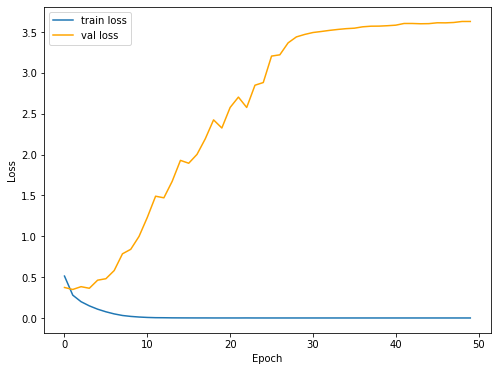

In [75]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

axes.plot(list(range(n_epochs)), train_loss_list, label="train loss")
axes.plot(list(range(n_epochs)), val_loss_list, color='orange', label="val loss")

axes.set_xlabel("Epoch")
axes.set_ylabel("Loss")

plt.legend()

In [78]:
def get_accuracy(model, train_dataloader, val_dataloader):
    for mode, loader in [("train", train_dataloader), ("val", val_dataloader)]:
        corrects = 0
        total = 0
        with torch.no_grad():
            for sequences, labels in loader:
                sequences = sequences.to(device=device)
                labels = labels.to(device=device)
                outputs = model(sequences)
                _, preds = torch.max(outputs, dim=1)
                total += labels.shape[0]
                corrects += int(sum(preds == labels))
        
        print(f"Accuracy {mode}: {round(corrects/total, 4)}")

In [79]:
get_accuracy(model, train_dataloader, test_dataloader)

Accuracy train: 1.0
Accuracy val: 0.8512


That's a pretty good val accuracy!